# Derivatives of a function with multiple variables

In the last exercise we: 
- implemented the forward kinematic for the Openmanipulator-X
- and implemented a way to solve the inverse kinematic with NLSolve.jl

What did we actually do when we used the NLSolve.jl package? We used an implementation of a root finding method to find the solution to our inverse kinematic problem. We learned in the lecture how to find the root of a set of functions with multiple variables. For example we learned that we can find the root of a set of functions with the Newton method. Can we actually implement the Newton method for multiple variables ourself? 

Well we need to know how to calculate the derivative of a function with multiple variables. In the next exercise we will take a closer look into the Newton Method for multiple variables. For now we will just look at the algorithm of the Newton method for multiple variables. Similar to the one dimensional case we calculate the next $\mathbf{x}$ which is closer to the root with the following calculation rule:

$$
\begin{split}\begin{split}
  \mathbf{x}_{n+1} &= \mathbf{x}_n - \mathbf{J}(\mathbf{x}_n)^{-1}\mathbf{f}(\mathbf{x}_n).
\end{split}\end{split}
$$
The calculation rule for the next $\mathbf{x}$ which is closer to the root is thus iteratively called over and over again. The calculation rule according to the Newton method is therefore:
$$
\mathbf{x}_0 = \text{start value}
$$
$$
\mathbf{x}_{1} = \mathbf{x}_0 - \mathbf{J}(\mathbf{x}_0)^{-1}\mathbf{f}(\mathbf{x}_0)
$$
$$
\mathbf{x}_{2} = \mathbf{x}_{1} - \mathbf{J}(\mathbf{x}_{1})^{-1}\mathbf{f}(\mathbf{x}_{1})
$$
...
$$
\mathbf{x}_{n+1} = \mathbf{x}_n - \mathbf{J}(\mathbf{x}_n)^{-1}\mathbf{f}(\mathbf{x}_n)
$$
We do this until we have reached the desired accuracy, i.e., the desired distance of $\mathbf{f}(\mathbf{x}_{n+1})$ to $\mathbf{0}$.

In the calculation rule we see that we need to calculate the function $\mathbf{f}(\mathbf{x})$, the derivative of the function (the Jacobian $\mathbf{J}(\mathbf{x})$) and the inverse of the Jacobian matrix $\mathbf{J}(\mathbf{x})^{-1}$.

**We are still missing some Important Parts...**

So let's start with estimating the derivative of a function with multiple variables.

# Derivatives of a functions with multiple variables

## Partial Derivatives
In the lecture we have already seen the partial derivative of a function with multiple variables. We can calculate the partial derivative of a function $f(x,y)$ with respect to $x$ by treating $y$ as a constant:
$$
\frac{\partial f}{\partial x} 
$$
We can interpret this as how much $f(x,y)$ changes when $x$ changes. We can do this for all variables of $f$. Hence, we can also calculate the partial derivative of the function $f(x,y)$ with respect to $y$ by treating $x$ as a constant. 

For our example from above $f(x,y) = 0.5*sin(x) + cos(y)$ we would get:
$$
\frac{\partial f(x,y)}{\partial x} = 0.5*cos(x)
$$
for the partial derivative with respect to $x$ and 
$$
\frac{\partial f(x,y)}{\partial y} = -sin(y)
$$
for the partial derivative with respect to $y$.

As an example, let's take a look again at the plot of the lecture were we plotted the partial derivative of $f(x,y)$ with respect to $x$ and $y$ seperately:

In [ ]:
using Revise
include("./PartialDerivativesPlot.jl")
using .PartialDerivativesPlot
using GLMakie

function parabola(x, y)
    return @. x^2 + y^2
end

angle = LinRange(0, 2*pi, 64)
radius = LinRange(0, 1, 16)

x = radius .* cos.(angle')
y = radius .* sin.(angle')
z = parabola(x, y)

tangentPoint=[0.0, 0.5]

with_theme(theme_dark()) do
    fig = Figure(resolution = (1000, 950), fontsize = 22)
    ax = LScene(fig[1,1], show_axis = true)

    sm = surface!(ax, x, y, z; colormap = :viridis, colorrange = (minimum(z), maximum(z)),
        transparency = false)

    # partial derivative w.r.t. x
    PartialDerivativesPlot.directionalbox!(ax, parabola, tangentPoint, :x, tangentColor=GLMakie.Colors.HSL(0, 1, 0.4))

    # partial derivative w.r.t. y
    PartialDerivativesPlot.directionalbox!(ax, parabola, tangentPoint, :y, tangentColor=GLMakie.Colors.HSL(125, 1, 0.4))

    display(fig)
end

## Total Derivatives

The total derivative of a function $f(x,y)$ with respect to $x$ and $y$ is defined as:
$$
d f = \frac{\partial f}{\partial x} {d x} + \frac{\partial f}{\partial y} {d y} =  f_x {d x} + f_y {d y} 
$$

Remember, the total derivative gives us the relationship of changes in the function $f(x,y)$ when $x$ and $y$ change. Hence $d x$ and $d y$ are not variables we can calculate with: $d x \neq \Delta x$. 
We can make an approximation: 
$$
\Delta x \approx \frac{\partial f}{\partial x} {\Delta x} + \frac{\partial f}{\partial y} {\Delta y}
$$

## Chain rule
If we want to calculate the derivative of a function $f(x(t),y(t))$ with respect another variable $t$, where $x(t)$ and $y(t)$ depend on $t$ we can use the chain rule:
$$
\frac{d f}{d t} = \frac{\partial f}{\partial x} \frac{d x}{d t} + \frac{\partial f}{\partial y} \frac{d y}{d t}
$$
This can also be written in a more general way:
$$
\frac{\partial f}{\partial t} = \frac{\partial f}{\partial x} \frac{\partial x}{\partial t} + \frac{\partial f}{\partial y} \frac{\partial y}{\partial t}
$$
This form is also valid for functions with more indepedant variables. 

## Gradient
The gradient of a function $f(x,y)$ is defined as:
$$
\nabla f = \begin{bmatrix}
\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}
\end{bmatrix}
$$
and we can write the total derivative as:
$$
d f = \nabla f \cdot \begin{bmatrix}
d x \\
d y
\end{bmatrix}
$$

## Jacobian Matrix
If we want to calculate the total derivative of a system of equations, we can define a function as $\mathbf{f}= \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}$ and the total derivative of this function is defined as:
$$
d \mathbf{f} = \begin{bmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{bmatrix} \cdot \begin{bmatrix}
d x \\
d y
\end{bmatrix}
= \mathbf{J} \cdot \begin{bmatrix}
d x \\
d y
\end{bmatrix}
$$
The matrix $\mathbf{J}$ is called the Jacobian matrix of the function $\mathbf{f}$. The Jacobian matrix is a matrix of all partial derivatives of the function $\mathbf{f}$ with respect to all variables. The columns of the Jacobian matrix are the gradients of the function $\mathbf{f}$ with respect to the variables: 
$$
\mathbf{J} = \begin{bmatrix}
\nabla f_1 \\
 \nabla f_2
\end{bmatrix} = \begin{bmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{bmatrix} 
$$


# Derivatives of a functions 
In the lecture, we learned different ways to calculate the derivative of a function:
- finite differences
    - forward difference
    - central difference
- automatic differentiation (AD)
    - forward mode
    - reverse mode

A good explanation for the error in estimating derivatives and automatic differentiation can be found here: https://book.sciml.ai/notes/08-Forward-Mode_Automatic_Differentiation_(AD)_via_High_Dimensional_Algebras/
Some parts of this exercise are based on these lecture notes.


## Finite Differences - Differenzenquotient
The derivative of a function $f(x)$ can be approximated by the finite differences:
$$
\frac{d f}{d x} \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$
This is called the forward difference. We can also use the central difference:
$$
\frac{d f}{d x} \approx \frac{f(x + \Delta x) - f(x - \Delta x)}{2 \Delta x}
$$

In the lecture we already discussed that the step size $\Delta x$ has a big influence on the error of the approximation. We want to investigate this influence and visualize the error for different step sizes $\Delta x$. What is the smallest number we can use for $\Delta x$? What happens if we use such a small number? What happens if we use a larger number? First lets check our machine precision $\epsilon$:

In [ ]:
prec = eps(Float64)

What does this number tell us? Since floating point numbers are scaled there is a limit to the precision of the numbers we want to represent and perform operations with. This is however relative to the size of the number:

In [ ]:
@show eps(1.0)
@show eps(0.1)
@show eps(0.01)

As we have seen in the lecture this can be a problem if we substract numbers that are close to each other. Let's check this again:

In [ ]:
ϵ = 1e-10rand()
@show ϵ
@show (1+ϵ)
ϵ2 = (1+ϵ) - 1
(ϵ - ϵ2)

By adding 1 to the small random number we lose the information of the last digits of the small number. When we substract 1 again we don't get the same number back. Hence, we have a loss of precision.

Ok, so now we want to see how this influence our finite differences approach. We learned that $\sqrt{\epsilon}$ is a good choice for $\Delta x$. In general we cannot expect a lower errer than approximately $\sqrt{\epsilon} \approx 10^{-8}$.

In [ ]:
@show sqrt(eps(Float64))

We use $\Delta x = 2.3*10^{-16}$ as the smallest number. For the largest number we use $\Delta x = 0.1$. Let's plot the error for different step sizes $\Delta x$.

Write a function which takes the function $f(x)$, a value for $x$, and a vector of step sizes $\Delta x$ and returns the forward and central differences of $f(x)$ at $x$ for the different step sizes $\Delta x$.

In [1]:
function FiniteDifferenceMethod(x::Real, our_eps::Vector, f::Function)
    forward = (f.(x.+our_eps) .- f.(x)) ./ our_eps
    central = (f.(x.+our_eps) .- f.(x.-our_eps)) ./ (2*our_eps)
    forward, central
end

FiniteDifferenceMethod (generic function with 1 method)

Plot the error of the the forward and central difference for the function $f(x) = x^2+sin(x)$ and for different step sizes $\Delta x$ from $0.1$ to $10^{-16}$.

In [2]:
import Plots
using LinearAlgebra
f(x) = x^2+sin(x)
df(x) = 2*x+cos(x) # analytical derivative of f to estimate the error

eps_length = 16
eps_range = 10 .^ -range(1, stop=16, length=eps_length)
eps_range[eps_length] = 2.3*10^-16 # set the last element to 2.3e-16
x = 1.0
real_dfx = df(x)
df_forw_eps, df_cent_eps = FiniteDifferenceMethod(x, eps_range, f)
error_forward = abs.(df_forw_eps.-real_dfx)
error_central = abs.(df_cent_eps.-real_dfx)

p1 = Plots.scatter(eps_range, error_forward, label="err(eps)" , title="forward", xlabel="log eps", ylabel="log error", xscale=:log10, yscale=:log10)
p2= Plots.scatter(eps_range, error_central, label="err(eps)" , title="central", xlabel="log eps", ylabel="log error", xscale=:log10, yscale=:log10)
Plots.plot(p3, p4)

UndefVarError: UndefVarError: `p3` not defined

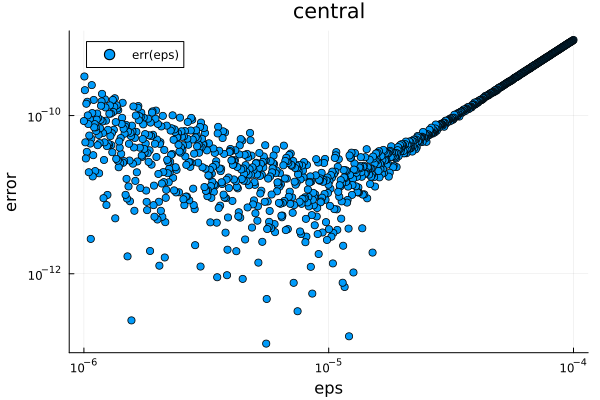

In [3]:
eps_range = 10 .^ -range(4, stop=6, length=1000)
df_fd_eps, df_cd_eps = FiniteDifferenceMethod(x, eps_range, f)

p3 = Plots.scatter(eps_range, abs.(df_cd_eps.-real_dfx), label="err(eps)" , title="central", xlabel="eps", ylabel="error", xscale=:log10, yscale=:log10)

### Derivatives of a function with multiple variables with finite differences
We have learned that the partial derivative of a function $f(x,y)$ with respect to $x$ is estimated by keeping $y$ constant and vice versa. We can use this approach to estimate the partial derivative using finite differences. Since the gradient of a function $f(x,y)$ is defined as:
$$
\nabla f = \begin{bmatrix}
\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}
\end{bmatrix}
$$
We can estimate the gradient with the partial derivative for each variable seperately.

Let's try this for the function $f(x, y) = x^2 + x*y$.

In [ ]:
f(x,y)=x^2+x*y
a, b = 1.0, 1.0 # We want to estimate the partial derivatives of f at (a,b)

f_x(x) = f(x, b)
f_y(y) = f(a, y)

real_df_dx = 2*a+b
real_df_dy = a

df_dx_f_c = FiniteDifferenceMethod(a, [10^-8], f_x)
df_dy_f_c = FiniteDifferenceMethod(b, [10^-8], f_y)
df_dx = df_dx_f_c[2][1]
df_dy = df_dy_f_c[2][1]
@show grad_f = [df_dx, df_dy]
@show real_grad_f = [real_df_dx, real_df_dy];

If we have another equation $g(x,y) = x^2 + y^2$ we can calculate the total derivative of the system of equations $f(x,y)$ and $g(x,y)$ with respect to $x$ and $y$ which is the Jacobian matrix:
$$
\mathbf{J} = \begin{bmatrix}
\nabla f \\
 \nabla g
\end{bmatrix} = \begin{bmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{bmatrix} 
$$

In [ ]:
g(x,y) = x^2 + y^2

g_x(x) = g(x, b)
g_y(y) = g(a, y)

real_dg_dx = 2*a
real_dg_dy = 2*b

dg_dx_f_c = FiniteDifferenceMethod(a, [10^-8], g_x)
dg_dy_f_c = FiniteDifferenceMethod(b, [10^-8], g_y)
dg_dx = dg_dx_f_c[2][1]
dg_dy = dg_dy_f_c[2][1]
@show grad_g = [dg_dx, dg_dy]
@show real_grad_g = [real_dg_dx, real_dg_dy]
@show jacobian_f = [df_dx df_dy; dg_dx dg_dy];

We used an inefficient way to calculate the Jacobian. We needed to calculate the partial derivative of each function with respect to each variable. There are more efficient ways to calculate the Jacobian matrix like using colored Jacobians or automatic differentiation (next section).

In practice you can use FiniteDifferences.jl to calculate the Jacobian matrix using finite differences. This package can be installed with `Pkg.add("FiniteDifferences")`. 
Let's try this out for the function 
$$
\mathbf{f(x)} =  \begin{bmatrix}
x_1^2 + x_1*x_2 \\
x_1^2 + x_2^2
\end{bmatrix} 
$$. 
We can use the function `jacobian` from the package FiniteDifferences.jl to calculate the Jacobian matrix:

In [5]:
import FiniteDifferences
f(x) = [x[1]^2+x[1]*x[2]; 
        x[1]^2+x[2]^2]
x = [1.0, 1.0]

FiniteDifferences.jacobian(FiniteDifferences.central_fdm(2, 1), f, x)[1]

2×2 Matrix{Float64}:
 3.0  1.0
 2.0  2.0

## Automatic Differentiation (AD)
Automatic Differentiation (AD) is a set of techniques to numerically evaluate the derivative of a function. AD is generally more accurate than the finite differences based numerical differentiation we used above. In the lecture we have seen two different methods of AD: the forward mode and the reverse mode (Backpropagation).

### Forward Mode
You have seen in the lecture that the forward mode AD makes use of dual numbers to calculate the derivative of a function. For each value $x$ we create a dual number $x + \epsilon x'$ where $\epsilon$ is a small number and $x'$ is the derivative of $x$. We can use the dual number to calculate the derivative of a function $f(x)$:
$$
f(x + \epsilon) = f(x) + \epsilon f'(x) + \mathcal{O}(\epsilon^2)
$$
As discussed in the lecture we defined $\epsilon^2 = 0$ and got:
$$
f(x + \epsilon) = f(x) + \epsilon f'(x)
$$

To use this in practice we have to implement $f(x)$ to support our dual numbers for each function we want to calculate the derivative. Hence, we have to implement what happens with the derivative $f'(x)$ for each operation we want to support. For example, for the addition of two dual numbers $x + \epsilon x'$ and $y + \epsilon y'$ we get:
$$
(x + \epsilon x') + (y + \epsilon y') = (x + y) + \epsilon (x' + y')
$$ 
We can see that the derivative of the addition is the addition of the derivatives. We can implement this in Julia by overloading the addition operator `+` for dual numbers. We can do this similarly for the other operations.

We can use the package `ForwardDiff.jl` to do this for us. Let's try this out for the function $f(x) = x^2 + sin(x)$. We can use the function `ForwardDiff.derivative` to calculate the derivative of $f(x)$ at $x$:

In [ ]:
import ForwardDiff
f(x) = x^2+sin(x)
df(x) = 2*x+cos(x) # analytical derivative of f to estimate the error

@show ForwardDiff.derivative(f, 1.0)
@show df(1.0);

We can calculate the gradient of a function $f(x,y)$ with respect to $x$ and $y$ using the function `ForwardDiff.gradient`:

In [ ]:
f(x) = x[1]^2+x[1]*x[2]

@show ForwardDiff.gradient(f, [1.0, 1.0]);

We can also calculate the Jacobian matrix using the function `jacobian` from `ForwardDiff`. This function takes a function as an argument and returns the Jacobian matrix of the function. Let's try this out for the function 
$$
\mathbf{f(x)} =  \begin{bmatrix}
x_1^2 + x_1*x_2 \\
x_1^2 + x_2^2
\end{bmatrix} 
$$.

In [ ]:
f(x) = [x[1]^2+x[1]*x[2]; 
        x[1]^2+x[2]^2]
x = [1.0, 1.0]

ForwardDiff.jacobian(f, x)

### Reverse Mode
When we want to compute the gradient of a function $f(x)$ with respect to $x$ we have seen that we can use the forward mode AD. This is a good choice if we have a function $f(x)$ with a small number of variables. If we have a function $f(x)$ with a large number of variables the forward mode AD is not efficient. In this case we can use the reverse mode AD (backpropagation, adjoint technique). In the lecture we have seen that the reverse mode AD uses the chain rule to calculate the gradient of a function $f(x(z), y(z))$ with respect to $z$. We can write the chain rule as:
$$
\frac{\partial f}{\partial z} = \frac{\partial f}{\partial x} \frac{\partial x}{\partial z} + \frac{\partial f}{\partial y} \frac{\partial y}{\partial z}
$$
where $x, y$ are intermediate variables. We can use this to calculate the gradient of a function $f(x(z), y(z))$ with respect to $z$ by calculating the partial derivative of $f(x(z), y(z))$ with respect to each intermediate variable $x$ or $y$ and multiplying it with the partial derivative of $x$ or $y$ with respect to $z$. We can see that we have to calculate the partial derivative of $f$ with respect to each intermediate variable $x,y $ and the partial derivative of $x,y $ with respect to $z$. A popular example for the use of reverse mode AD is in deep learning to calculate the gradient of the loss function with respect to the weights of the neural network. In this case we have a large number of weights and often a scalar loss function. Hence, the reverse mode AD is a good choice. Now we want to take a look at the reverse mode AD in practice. We will use the package `ReverseDiff.jl` to do this. Let's try this out for the function $f(x_1, x_2) = x_1^2 + x_1*x_2$. 

If you are interested in the details of reverse mode AD you can have a look at the lecture slides again or find a good explanation here: https://book.sciml.ai/notes/10-Basic_Parameter_Estimation-Reverse-Mode_AD-and_Inverse_Problems/

In [ ]:
using Pkg
Pkg.add("ReverseDiff")

In [ ]:
import ReverseDiff

f(x) = x[1]^2+x[1]*x[2]
ReverseDiff.gradient(f, [1.0, 1.0])

In [ ]:
f(x) = [x[1]^2+x[1]*x[2]; 
        x[1]^2+x[2]^2]
ReverseDiff.jacobian(f, [1.0, 1.0])

We can see for the basic usage `ReverseDiff` and `ForwardDiff` are very similar. Which one you should use depends on the function you want to differentiate. It is very well summarized in https://book.sciml.ai: Forward mode computes columns of a Jacobian, while reverse mode computes gradients (rows of a Jacobian). Therefore, the relative efficiency of the two approaches is based on the size of the Jacobian. 
For $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ with $n$ variables and $m$ functions the Jacobian is a $m \times n$ matrix. So computing each row will be much faster if $m$ is much smaller than $n$. Or in other words if the number of variables is larger than the number of functions, then reverse mode is more efficient. If the number of functions is larger than the number of variables, then forward mode is more efficient. If $m$ and $n$ are relatively equal forward mode is often more efficient since reverse mode has a high overhead compared to forward mode. If you are not sure which approach to use you can try both and benchmark the results.

# Calculation the end effector velocity based on the joint velocities

We can measure the joint velocities of our Openmanipulator. However, we are interested in the speed of the end effector. We have seen in the lecture that we can calculate the end effector velocity based on the joint velocities using the Jacobian matrix. 

## Estimating the Jacobian matrix of the Openmanipulator-X kinematics
To estimate the velocity of the end effector we need to know the forward kinematics of the Openmanipulator-X and estimate the derivative of the forward kinematics. 



In [ ]:
import Pkg
Pkg.activate("../Exercise 3/OpenMEnv") 
using Revise
include("../OpenManipulatorLib/OpenManipulatorKinematics.jl")
using .OpenManipulatorKineamtics

Estimate the jacobian matrix of the forward kinematics for our robot arm using automatic differentiation. We can use the function `ForwardDiff.jacobian` to calculate the Jacobian matrix of the forward kinematics. 

In [ ]:
using ForwardDiff

function openmanipulator_jacobian(q)
    # Define a function that returns the position of the end effector
    f(q) = OpenManipulatorKineamtics.complete_forward_kinematics(q)[1]

    # Calculate the Jacobian matrix using ForwardDiff.jacobian
    J = ForwardDiff.jacobian(f, q)

    return J
end

Now we can use the function `ReverseDiff.jacobian` to calculate the Jacobian matrix of the forward kinematics.

In [ ]:
using ReverseDiff

function openmanipulator_jacobian_rev_AD(q)
    # Define a function that returns the position of the end effector
    f(q) = OpenManipulatorKineamtics.complete_forward_kinematics(q)[1]

    # Calculate the Jacobian matrix using ForwardDiff.jacobian
    J = ReverseDiff.jacobian(f, q)

    return J
end

Now estimate the jacobian matrix using finite differences:

In [ ]:
import FiniteDifferences

function openmanipulator_jacobian_finiteDiff(q)
    # Define a function that returns the position of the end effector
    f(q) = OpenManipulatorKineamtics.complete_forward_kinematics(q)[1]
    
    J = FiniteDifferences.jacobian(FiniteDifferences.central_fdm(2, 1), f, q)[1]

    return J
end

Now, lets compare the time and results of the methods. What do you observe?

In [ ]:
q = [0.1, 0.0, 0.0, 0.1]

In [ ]:
@time openmanipulator_jacobian(q)

In [ ]:
@time openmanipulator_jacobian_rev_AD(q)

In [ ]:
@time openmanipulator_jacobian_finiteDiff(q)

## Calculating the end effector velocity using the Jacobian matrix

Erlier we said that based on the total derivative we can derive the rule for differentiating our system of equations $f_1(x,y)$ and $f_2(x,y)$ with respect to the variable $t$ when $x$ and $y$ are functions of $t$:
$$
\frac{d}{dt} \begin{bmatrix}
f_1(x,y) \\
f_2(x,y)
\end{bmatrix} = \begin{bmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{bmatrix} \begin{bmatrix}
\frac{\partial x}{\partial t} \\
\frac{\partial y}{\partial t}
\end{bmatrix}
= \mathbf{J} \begin{bmatrix}
\frac{\partial x}{\partial t} \\
\frac{\partial y}{\partial t}
\end{bmatrix}
$$

Based on this rule we can estimate the end effector velocity using the Jacobian matrix. We can use the following estimation:
$$
v = \mathbf{J}(q) * \mathbf{q}_v = \mathbf{J}(q) * \begin{bmatrix}
\frac{\partial q_1}{\partial t} \\
\frac{\partial  q_2}{\partial t} \\
\frac{\partial  q_3}{\partial t} \\
\frac{\partial  q_4}{\partial t} \\
\end{bmatrix} 
\approx J(q) * \begin{bmatrix}
\Delta q_1 \\
\Delta q_2 \\
\Delta q_3 \\
\Delta q_4 \\
\end{bmatrix} 
$$

where $v$ is the end effector velocity, $\mathbf{J}(q)$ is the Jacobian matrix evaluated at the current joint angles $q$, and $\mathbf{q}_v$ is the joint velocity vector, which we can estimate with the joint approximate velocities $\Delta q_1$, $\Delta q_2$, $\Delta q_3$, and $\Delta q_4$.

Implement the `endeffector_velocity` function that uses the Jacobian matrix to calculate the end effector velocity. The function should takes in the joint angles `q` and joint velocity vector `q_v`, and returns the end effector velocity `v` calculated using the Jacobian matrix. Use the `openmanipulator_jacobian` function you implemented to calculate the Jacobian matrix.

In [ ]:
function endeffector_velocity(q, q_v)
    # Calculate the Jacobian matrix at the current joint angles
    J = openmanipulator_jacobian(q)

    # Calculate the end effector velocity using the Jacobian matrix
    v = J * q_v

    return v
end

Let's test the function with the following joint angles and joint velocities:

In [ ]:
q_v = [0.0, 0.0, 0.0, 0.0]
v = endeffector_velocity(q, q_v)

## Applying the end effector velocity calculation to the Openmanipulator-X

- let's start the Openmanipulator and subscrib to the joint states
- Calculate the end effector velocity using the joint velocities and the Jacobian matrix
- Do this by adding a new function which is the new callback function for the joint states subscriber and which calls the `endeffector_velocity` function
- print the end effector velocity to the console while you move the Openmanipulator

Since we are working with subscriptions it might be handy to be ablte to restart the notebook withour restarting Gazebo. Go to your Terminal and start the following two programs in seperate cells:

```bash
roslaunch open_manipulator_gazebo open_manipulator_gazebo.launch
```

```bash
roslaunch open_manipulator_controller open_manipulator_controller.launch use_platform:=false
```



In [ ]:
include("../OpenManipulatorLib/OpenManipulatorBase.jl")
using .OpenManipulatorBase

In [ ]:
OpenManipulatorBase.init()

In [ ]:
function sub_joint_to_endeffector(list)
    OpenManipulatorBase.reset_robot()
    OpenManipulatorBase.rossleep(0.5)

    function joint_state_sub_callback(sensor_msg::JointState, a::Array{Any,1})
        header_time = to_sec(sensor_msg.header.stamp)/60.0 # header time in minutes
        names = sensor_msg.name
        positions = sensor_msg.position
        velocities = sensor_msg.velocity
        # v = J * q_v
        joint_names = names[3:6]
        q_v = velocities[3:6]
        q = positions[3:6]
        v = endeffector_velocity(q, q_v)
        println("Header Time: $header_time minutes")
        println("Name: $joint_names")
        println("Joint Velocities: $q_v")
        println("Joint Angles: $q")
        println("End Effector Velocity: $v")
        push!(a, v)
        if length(a) >= 2
            unsubscribe(sub)
        end
    end

    sub = Subscriber{JointState}("/joint_states", joint_state_sub_callback, (list,), queue_size=1)

    sending_time = to_sec(RobotOS.now())/60.0
    println("Sending Time: $sending_time minutes")
    OpenManipulatorBase.set_joint_angles([0.6, 0.6, -0.5, -0.1])
    after_sending_time = to_sec(RobotOS.now())/60.0
    println("After sending Time: $after_sending_time minutes")
    OpenManipulatorBase.rossleep(1.0)
    return list
end

In [ ]:
list = []
list = sub_joint_to_endeffector(list)
sleep(3.0)
println("End Effector Velocities: $list")